In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def calculate_mean(data):
    temp = data.copy()
    for key1 in data:
        for key2 in data[key1]:
            temp[key1][key2] = np.mean(
                np.array([data[key1][key2][i] for i in data[key1][key2].keys()])
            )
    return temp


In [3]:
# read all the pickle files from results folder
bert = pd.read_pickle("results/results_bert.pkl")
coref = pd.read_pickle("results/results_coref.pkl")
ner = pd.read_pickle("results/results_ner.pkl")
nli = pd.read_pickle("results/results_nli.pkl")
paraphrase = pd.read_pickle("results/results_paraphrase.pkl")
qa = pd.read_pickle("results/results_qa.pkl")
sa = pd.read_pickle("results/results_sa.pkl")
srl = pd.read_pickle("results/results_srl.pkl")
ss = pd.read_pickle("results/results_ss.pkl")
sums = pd.read_pickle("results/results_sum.pkl")
wsd = pd.read_pickle("results/results_wsd.pkl")

ensemble_avg = pd.read_pickle("results/results_ensemble_avg.pkl")
ensemble_wt_avg = pd.read_pickle("results/results_ensemble_wt_avg.pkl")
ensemble_std_stack = pd.read_pickle("results/results_ensemble_std_stack.pkl")
ensemble_avg_stack = pd.read_pickle("results/results_ensemble_avg_stack.pkl")
ensemble_dyn_wt = pd.read_pickle("results/results_ensemble_dyn_wt.pkl")


In [4]:
results = {
    "bert": bert,
    "coref": coref,
    "ner": ner,
    "nli": nli,
    "paraphrase": paraphrase,
    "qa": qa,
    "sa": sa,
    "srl": srl,
    "ss": ss,
    "sums": sums,
    "wsd": wsd,
    "ensemble_avg": ensemble_avg,
    "ensemble_wt_avg": ensemble_wt_avg,
    "ensemble_std_stack": ensemble_std_stack,
    "ensemble_avg_stack": ensemble_avg_stack,
    "ensemble_dyn_wt": ensemble_dyn_wt,
}


In [5]:
for i in results.keys():
    results[i] = calculate_mean(results[i])


In [6]:
plot_2v2 = {
    "bert": list(results["bert"]["2v2"].values()),
    "coref": list(results["coref"]["2v2"].values()),
    "ner": list(results["ner"]["2v2"].values()),
    "nli": list(results["nli"]["2v2"].values()),
    "paraphrase": list(results["paraphrase"]["2v2"].values()),
    "qa": list(results["qa"]["2v2"].values()),
    "sa": list(results["sa"]["2v2"].values()),
    "srl": list(results["srl"]["2v2"].values()),
    "ss": list(results["ss"]["2v2"].values()),
    "sums": list(results["sums"]["2v2"].values()),
    "wsd": list(results["wsd"]["2v2"].values()),
    "ensemble_avg": list(results["ensemble_avg"]["2v2"].values()),
    "ensemble_wt_avg": list(results["ensemble_wt_avg"]["2v2"].values()),
    "ensemble_std_stack": list(results["ensemble_std_stack"]["2v2"].values()),
    "ensemble_avg_stack": list(results["ensemble_avg_stack"]["2v2"].values()),
    "ensemble_dyn_wt": list(results["ensemble_dyn_wt"]["2v2"].values()),
}


plot_pear = {
    "bert": list(results["bert"]["pear"].values()),
    "coref": list(results["coref"]["pear"].values()),
    "ner": list(results["ner"]["pear"].values()),
    "nli": list(results["nli"]["pear"].values()),
    "paraphrase": list(results["paraphrase"]["pear"].values()),
    "qa": list(results["qa"]["pear"].values()),
    "sa": list(results["sa"]["pear"].values()),
    "srl": list(results["srl"]["pear"].values()),
    "ss": list(results["ss"]["pear"].values()),
    "sums": list(results["sums"]["pear"].values()),
    "wsd": list(results["wsd"]["pear"].values()),
    "ensemble_avg": list(results["ensemble_avg"]["pear"].values()),
    "ensemble_wt_avg": list(results["ensemble_wt_avg"]["pear"].values()),
    "ensemble_std_stack": list(results["ensemble_std_stack"]["pear"].values()),
    "ensemble_avg_stack": list(results["ensemble_avg_stack"]["pear"].values()),
    "ensemble_dyn_wt": list(results["ensemble_dyn_wt"]["pear"].values()),
}


In [7]:
df_2v2 = pd.DataFrame(
    plot_2v2,
    columns=list(plot_2v2.keys()),
    index=[
        "language_lh",
        "language_rh",
        "vision_body",
        "vision_face",
        "vision_object",
        "vision_scene",
        "vision",
        "dmn",
        "task",
    ],
)


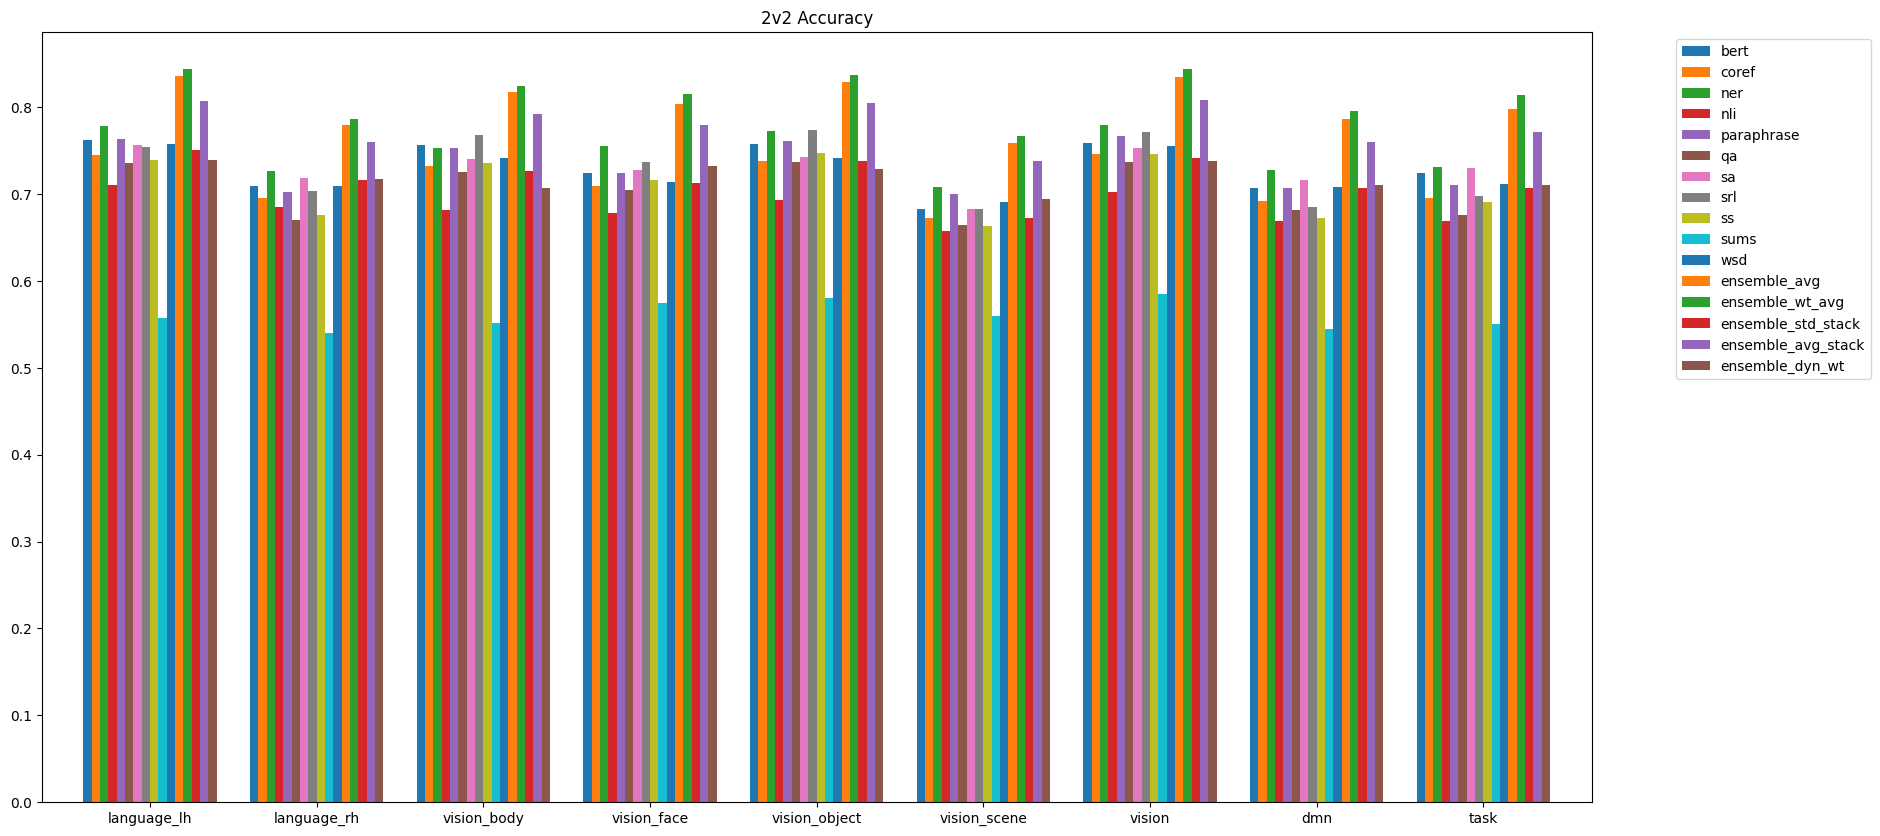

In [8]:
results_2v2 = df_2v2.plot.bar(figsize=(20, 10), width=0.8, title="2v2 Accuracy", rot=0)
results_2v2.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
results_2v2.get_figure().savefig("results/2v2.png")


In [9]:
df_pear = pd.DataFrame(
    plot_pear,
    columns=list(plot_pear.keys()),
    index=[
        "language_lh",
        "language_rh",
        "vision_body",
        "vision_face",
        "vision_object",
        "vision_scene",
        "vision",
        "dmn",
        "task",
    ],
)


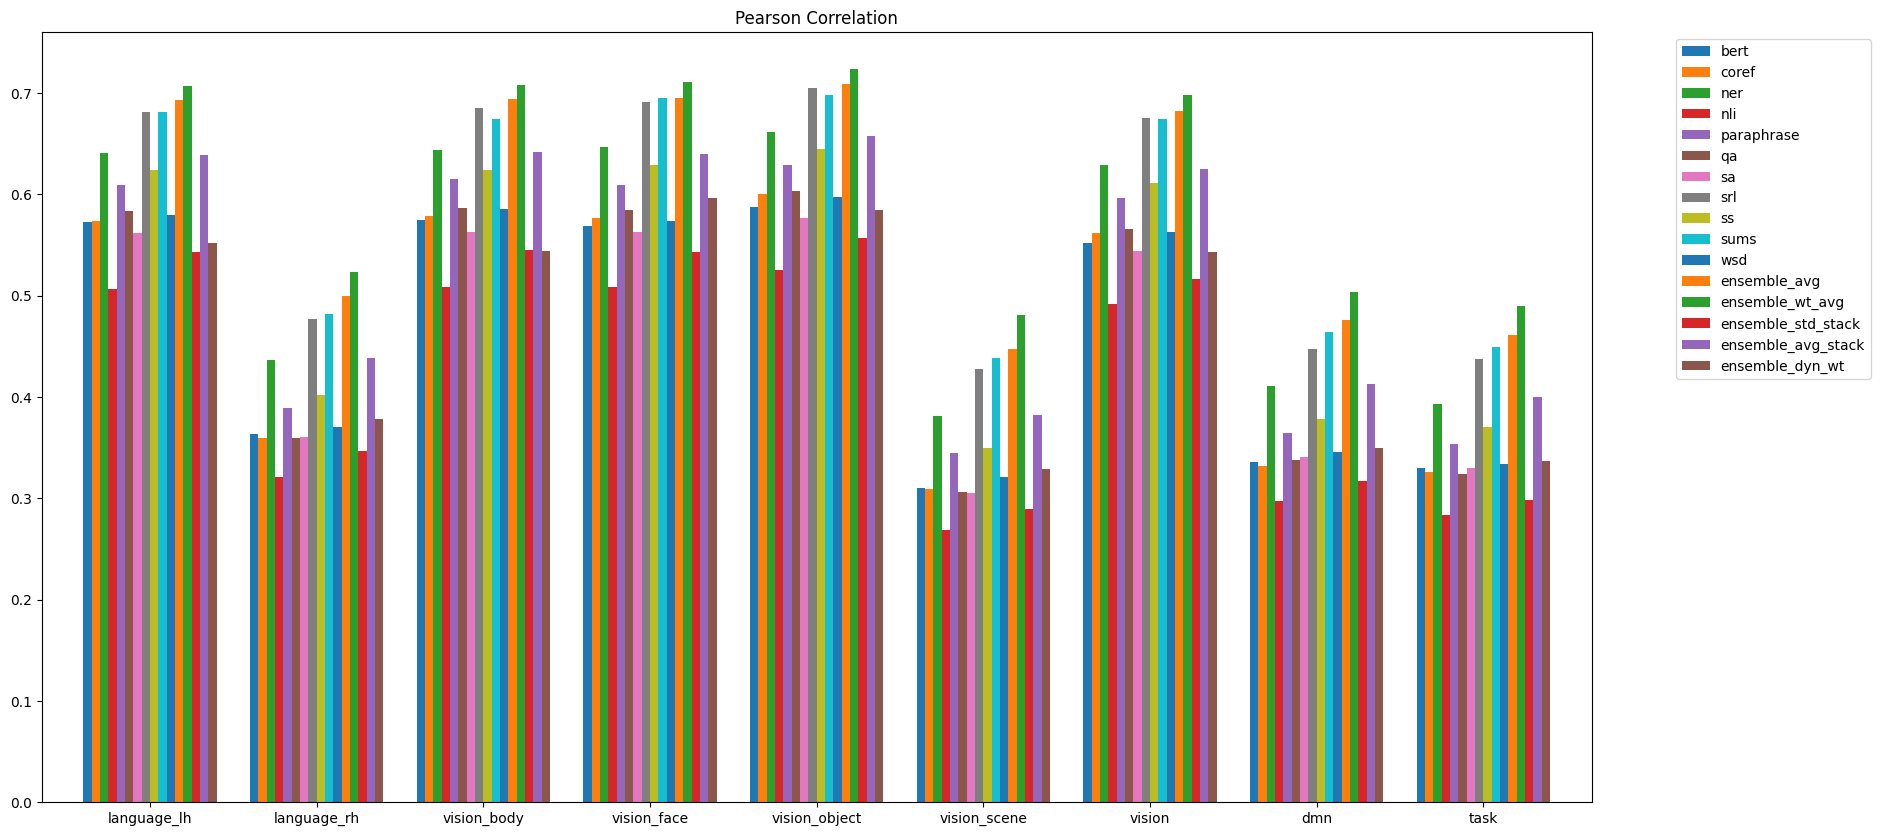

In [10]:
results_pear = df_pear.plot.bar(
    figsize=(20, 10), width=0.8, title="Pearson Correlation", rot=0
)
results_pear.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
results_pear.get_figure().savefig("results/pear.png")
